# Vehicle CO2 Emissions Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/co2.csv')

## Exploratory Data Analysis

In [3]:
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(7385, 12)

In [5]:
df.size

88620

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [9]:
df.duplicated().sum()

1103

In [10]:
df.nunique()

,0
Make,42
Model,2053
Vehicle Class,16
Engine Size(L),51
Cylinders,8
Transmission,27
Fuel Type,5
Fuel Consumption City (L/100 km),211
Fuel Consumption Hwy (L/100 km),143
Fuel Consumption Comb (L/100 km),181


## Data visualization

In [11]:
# Duplicating dataset for data visualization

df_dv = df.copy()

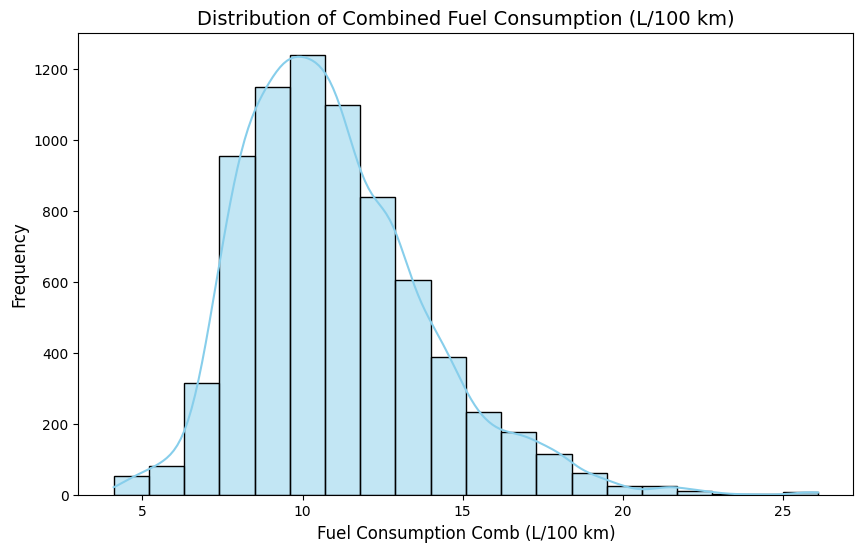

In [12]:
# Fuel Consumption Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df_dv['Fuel Consumption Comb (L/100 km)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Combined Fuel Consumption (L/100 km)', fontsize=14)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

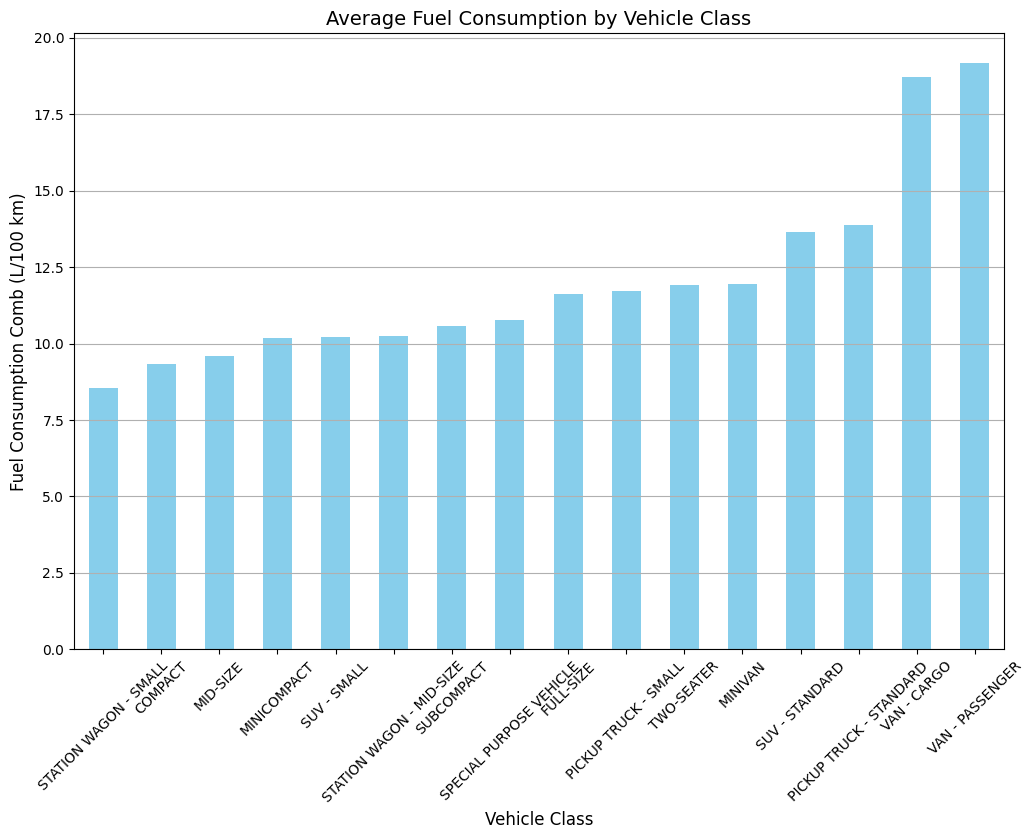

In [13]:
# Average Fuel Consumption by Vehicle Class

avg_fuel_by_class = df_dv.groupby('Vehicle Class')['Fuel Consumption Comb (L/100 km)'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_fuel_by_class.plot(kind='bar', color='skyblue')
plt.title('Average Fuel Consumption by Vehicle Class', fontsize=14)
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

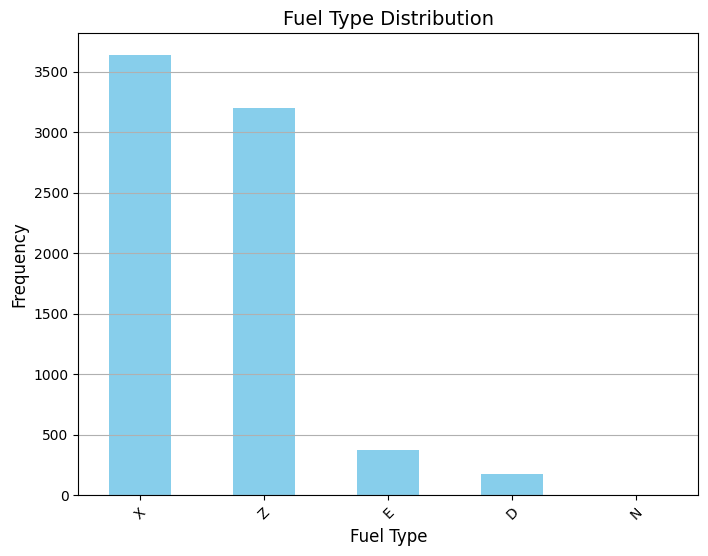

In [14]:
# Fuel Type Distrubution

plt.figure(figsize=(8, 6))
fuel_counts = df_dv['Fuel Type'].value_counts()
fuel_counts.plot(kind='bar', color='skyblue')
plt.title('Fuel Type Distribution', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

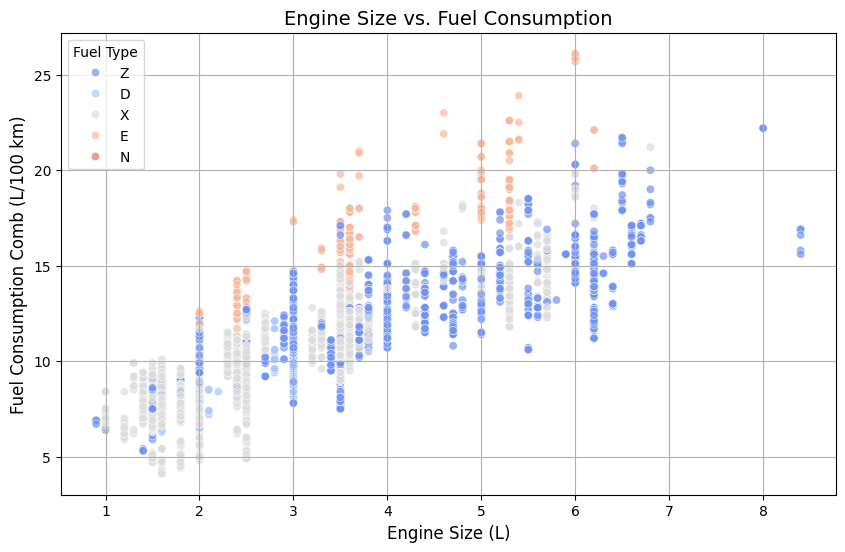

In [15]:
# Engine Size vs Fuel Consumption

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size(L)', y='Fuel Consumption Comb (L/100 km)', hue='Fuel Type', data=df_dv, palette='coolwarm', alpha=0.7)
plt.title('Engine Size vs. Fuel Consumption', fontsize=14)
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

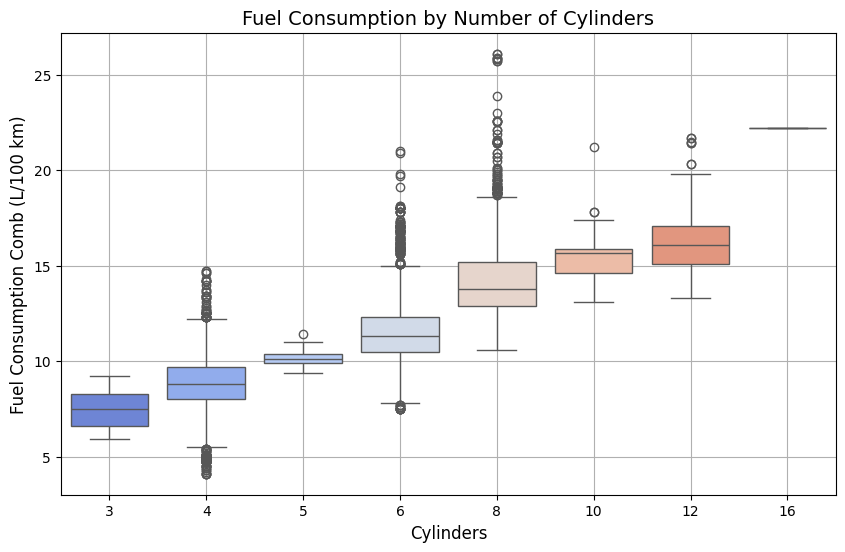

In [16]:
# Cylinders vs Fuel Consumption

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cylinders', y='Fuel Consumption Comb (L/100 km)', data=df_dv, palette='coolwarm')
plt.title('Fuel Consumption by Number of Cylinders', fontsize=14)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.grid(True)
plt.show()

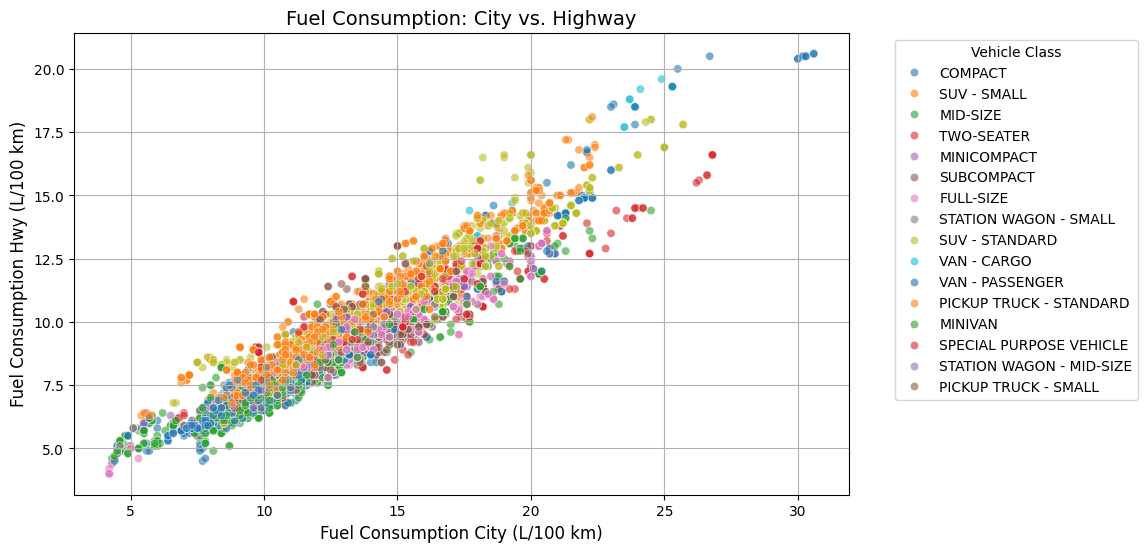

In [17]:
# Fuel Consumption City vs. Highway

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Vehicle Class', data=df, palette='tab10', alpha=0.6)
plt.title('Fuel Consumption: City vs. Highway', fontsize=14)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.ylabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.legend(title='Vehicle Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

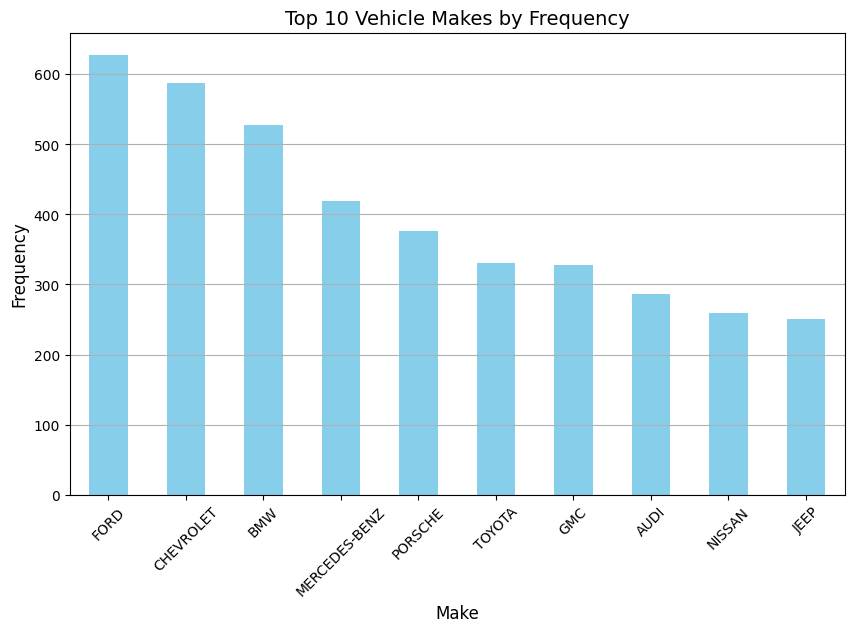

In [18]:
# Top 10 makes by frequency

top_makes = df_dv['Make'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_makes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Vehicle Makes by Frequency', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

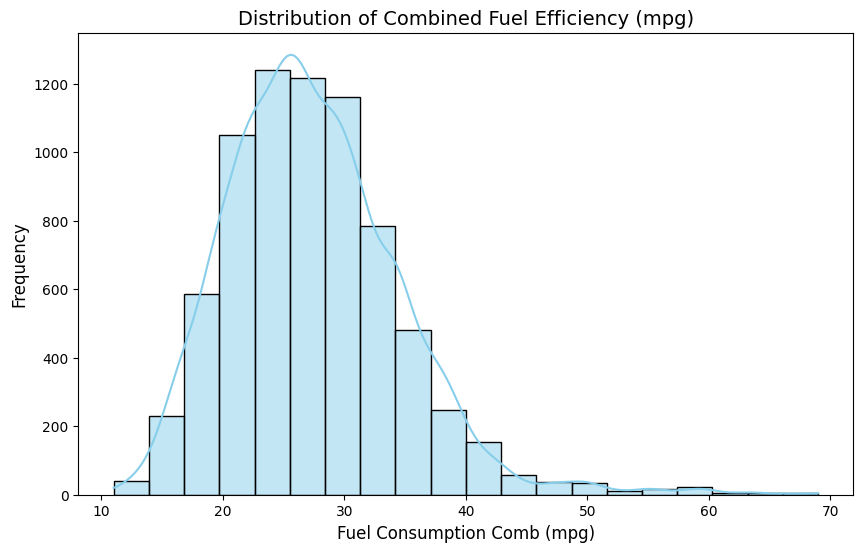

In [19]:
# Fuel Efficiency in MPG

plt.figure(figsize=(10, 6))
sns.histplot(df_dv['Fuel Consumption Comb (mpg)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Combined Fuel Efficiency (mpg)', fontsize=14)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

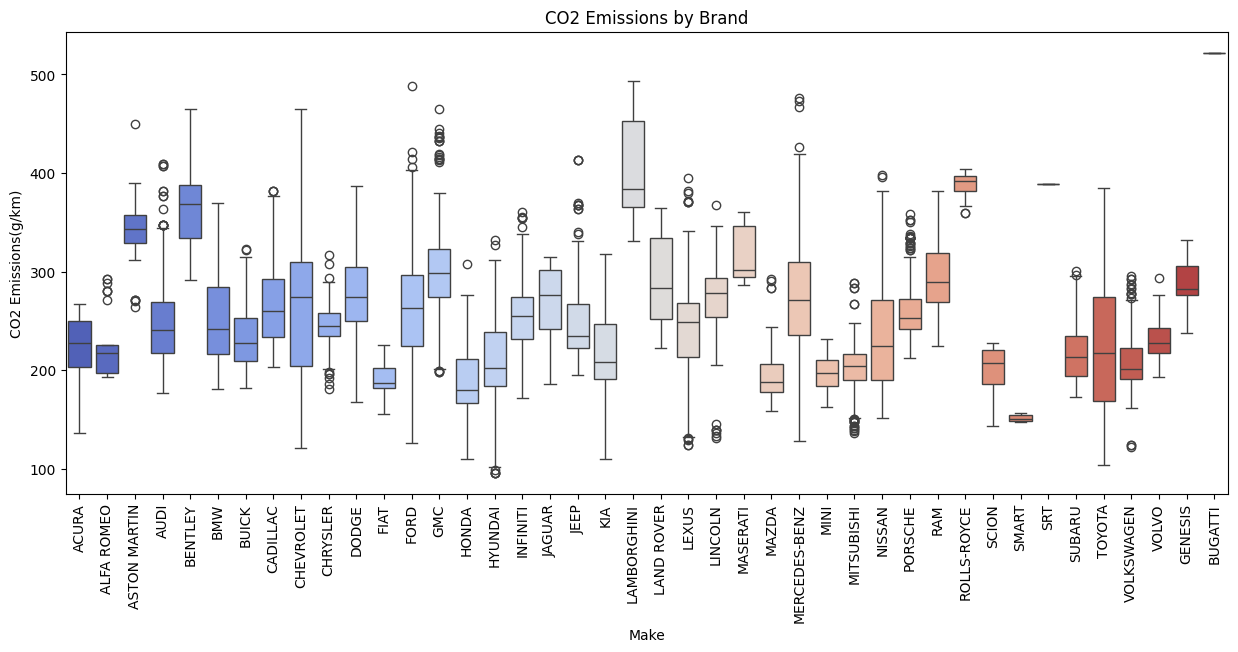

In [20]:
# CO2 Emissions by Brand

plt.figure(figsize=(15, 6))
sns.boxplot(x='Make', y='CO2 Emissions(g/km)', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Brand')
plt.show()

## Data Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
X = df.drop('CO2 Emissions(g/km)', axis=1)
y = df['CO2 Emissions(g/km)']

In [23]:
# Train test and split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Categorical feature Conversion

numeric_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                    'Fuel Consumption Comb (mpg)']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Model Building

In [30]:
from sklearn.linear_model import LinearRegression


In [31]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [32]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption City '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Hwy '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(mpg)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Model',
                                                   'Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type'])])),
                ('regressor', LinearRegression())])

## Model Prediction

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 29.993701242946667
Root Mean Squared Error: 5.4766505496468065
R-squared: 0.9912799563359063
